## Tf-IDF And W2V

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

import string
import time
import numpy as np
import pandas as pd 
import os

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

import sklearn
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")


In [2]:
financial_dataset = pd.read_csv(r'C:\Users\Halil İbrahim\Desktop\Kalbye.AI\Kişisel Yazılar ve Notebooklar\W2V\data.csv')
df = financial_dataset.copy()
df.head()

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

when we are looking table where above of here. We are seeing Sentiment variable is a targer variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
print("Sentiment Variable Unique Values:",df['Sentiment'].unique())
print("Sentiment Varaible Each Value Counts:\n",df['Sentiment'].value_counts())

Sentiment Variable Unique Values: ['positive' 'negative' 'neutral']
Sentiment Varaible Each Value Counts:
 neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


In [5]:
import plotly.graph_objects as go
# We will seperate df for each value in Sentiment Variable. Because  we will see how to sentences are distributed according
# to the sentiment values.
all_positive_sentences = df[df['Sentiment'] == 'positive']['Sentence']
all_negative_sentences = df[df['Sentiment'] == 'negative']['Sentence']
all_neutral_sentences = df[df['Sentiment'] == 'neutral']['Sentence']

all_positive_words = []
for sentence in all_positive_sentences:
    all_positive_words.append(sentence.count(' '))

all_negative_words = []
for sentence in all_negative_sentences:
    all_negative_words.append(sentence.count(' '))

all_neutral_words = []
for sentence in all_neutral_sentences:
    all_neutral_words.append(sentence.count(' '))
    
x0 = np.array(all_positive_words)
x1 = np.array(all_negative_words)
x2 = np.array(all_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x = x2, name = 'Neutral'))
fig.add_trace(go.Histogram(x = x0, name = 'Positive'))
fig.add_trace(go.Histogram(x = x1, name = 'Negative'))


#We are doing overlay plot
fig.update_layout(barmode = 'overlay')

fig.update_traces(opacity = 0.80)
fig.show()

In [6]:
#In the Sentence variable. We have to convert lower all of words. Because we compare each others and we will do tokenization.
print("Before Words Lower:\n",df['Sentence'][1])
df["Sentence"] = df["Sentence"].str.lower()
print("After Words Lower:\n", df['Sentence'][1])

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Cleaning Stopwords. because when we are leaning model. MOdel have to looks only neccassery words in the text. SO we cleaning stopword.
#What are stopwords? is, are, have, has, etc. in english of course. Change according to language.
stop_words = stopwords.words("english")
#Word Tokenize method seperating text tokens
print("Sentence with stop words:\n", df['Sentence'][1])
df['Sentence'] = df['Sentence'].apply(lambda text: word_tokenize(text))

non_stop_words = df['Sentence'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print("Sentence not with stop words:\n",non_stop_words[1]),
                                        
df['Sentence'] = non_stop_words


#Cleaning punctuation
# We will convert to string on punctuation. Cause of we will that text making tranform a few minutes later.
punct_to_remove = string.punctuation

def remove_punctuation_and_numbers(text):
    text = re.sub(r'#','',text)
    text = re.sub(r'[0-9]','',text)
    return text.translate(str.maketrans("","",punct_to_remove))

print("Before Punctuation:\n",df['Sentence'][1])
df['Sentence'] = df['Sentence'].apply(lambda text: remove_punctuation_and_numbers(text))
print("After Punctuation:\n",df['Sentence'][1])

#Tokenization
print("Before Tokenization:\n",df["Sentence"][1])
sentences_values = df['Sentence'].values
sentences_values_list = [nltk.word_tokenize(title) for title in sentences_values] 
print("After Tokenization:\n",df['Sentence'][1])

Before Words Lower:
 $ESI on lows, down $1.50 to $2.50 BK a real possibility
After Words Lower:
 $esi on lows, down $1.50 to $2.50 bk a real possibility


[nltk_data] Downloading package stopwords to C:\Users\Halil
[nltk_data]     İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Halil
[nltk_data]     İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentence with stop words:
 $esi on lows, down $1.50 to $2.50 bk a real possibility
Sentence not with stop words:
 $ esi lows , $ 1.50 $ 2.50 bk real possibility
Before Punctuation:
 $ esi lows , $ 1.50 $ 2.50 bk real possibility
After Punctuation:
  esi lows      bk real possibility
Before Tokenization:
  esi lows      bk real possibility
After Tokenization:
  esi lows      bk real possibility


### Stemming and Lemmazation

In [7]:
def stemming(word):
    stemmer = PorterStemmer()
    stem_word = stemmer.stem(word)
    return stem_word

In [8]:
def lemmazation(word):
    Lemmatize = WordNetLemmatizer()
    lemma_word = Lemmatize.lemmatize(word)
    return lemma_word

In [9]:
def stem_seperate_words(sentence_df):
    sentence_array_result = []
    for sentence in sentence_df:
        sentence_array =[]
        for word in sentence.split():
            sentence_array.append(stemming(word))
        sentence_array_result.append(sentence_array)
    return sentence_array_result

In [10]:
def lemma_seperate_words(sentence_df):
    sentence_array_result = []
    for sentence in sentence_df:
        sentence_array =[]
        for word in sentence.split():
            sentence_array.append(lemmazation(word))
        sentence_array_result.append(sentence_array)
    return sentence_array_result

In [11]:
nltk.download('wordnet')
nltk.download('omw-1.4')
sentence_array_result_stem = stem_seperate_words(df['Sentence'])
sentence_array_result_lemma = lemma_seperate_words(df['Sentence'])

[nltk_data] Downloading package wordnet to C:\Users\Halil
[nltk_data]     İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Halil
[nltk_data]     İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Machine Learning

In [12]:
features_stem = sentence_array_result_stem
features_lemma = sentence_array_result_lemma
labels = df['Sentiment']

In [13]:
print("Features shape:", np.shape(features_stem))
print("Label Shape:", np.shape(labels))

Features shape: (5842,)
Label Shape: (5842,)


#### Model Split

In [14]:
from sklearn.model_selection import train_test_split
#Train test split 
X_train_stem,X_test_stem,y_train_stem,y_test_stem = train_test_split(features_stem,labels, test_size = 0.33, random_state = 42)
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(features_lemma, labels, test_size = 0.33, random_state = 42)

FastText For X_test_stem and X_test_lemma

In [15]:
from gensim.models import FastText
model_stem_ft = FastText(X_train_stem,window=10,min_count=20,vector_size = 100,workers = -1)
model_lemma_ft = FastText(X_train_lemma,window=10,min_count=20,vector_size = 100,workers = -1)

In [16]:
def sentence_vector(model, text_list):
    sentence_vectors = []
    
    for sentence in text_list:
        word_vectors = []
        for word in sentence:
            word = model.wv[word]
            word_vectors.append(word)
        word_vectors_array = np.array(word_vectors)
        word_vectors_array_mean = np.mean(word_vectors_array,axis = 0)
        sentence_vectors.append(word_vectors_array_mean)
    return sentence_vectors

Method execution 

In [17]:
X_train_stem_vectors = sentence_vector(model_stem_ft, X_train_stem)
X_test_stem_vectors = sentence_vector(model_stem_ft,X_test_stem)
X_train_lemma_vectors = sentence_vector(model_stem_ft, X_train_lemma)
X_test_lemma_vectors = sentence_vector(model_stem_ft, X_test_lemma)

In [18]:
X_train_stem_vectors_array = np.array(X_train_stem_vectors)
X_test_stem_vectors_array = np.array(X_test_stem_vectors)
X_train_lemma_vectors_array = np.array(X_train_lemma_vectors)
X_test_lemma_vectors_array = np.array(X_test_lemma_vectors)

print("X train Stem Shape",X_train_stem_vectors_array.shape)
print("X test Stem Shape",X_test_stem_vectors_array.shape)
print("X train Lemma Shape",X_train_lemma_vectors_array.shape)
print("X test Lemma Shape",X_test_lemma_vectors_array.shape)

X train Stem Shape (3914, 100)
X test Stem Shape (1928, 100)
X train Lemma Shape (3914, 100)
X test Lemma Shape (1928, 100)


### Visualization

In [19]:
def seperating(model):
    labels  = []
    tokens = []
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    return labels,tokens

In [20]:
def plot_two_dimension(model,title):
    
    labels,tokens = seperating(model)
    
    tsne = TSNE(random_state = 12)


    tsne_values = tsne.fit_transform(tokens)

    x_values = []
    y_values = []
 
    for value in tsne_values:
        x_values.append(value[0])
        y_values.append(value[1])
    
    plt.figure(figsize= (15,15))
    for i in range(0,len(x_values)):
        plt.scatter(x_values[i],y_values[i])
        plt.annotate(labels[i],
                     xy = (x_values[i],y_values[i]))
    plt.title(title)
    plt.show()

In [21]:
def plot_three_dimension(model,title):
    
    labels,tokens = seperating(model)
    
    tsne_3d = TSNE(n_components = 3,random_state = 12)


    tokens_3d = tsne_3d.fit_transform(tokens)
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(projection = '3d')
    
    for i in range(0,len(tokens_3d)):
        ax.scatter(tokens_3d[i,0],tokens_3d[i,1],tokens_3d[i,2])
        ax.text(tokens_3d[i,0],tokens_3d[i,1],tokens_3d[i,2],  '%s' % (str(labels[i])), size=7,zorder=1,  
    color='k')
    plt.title(title)
    plt.show()
    

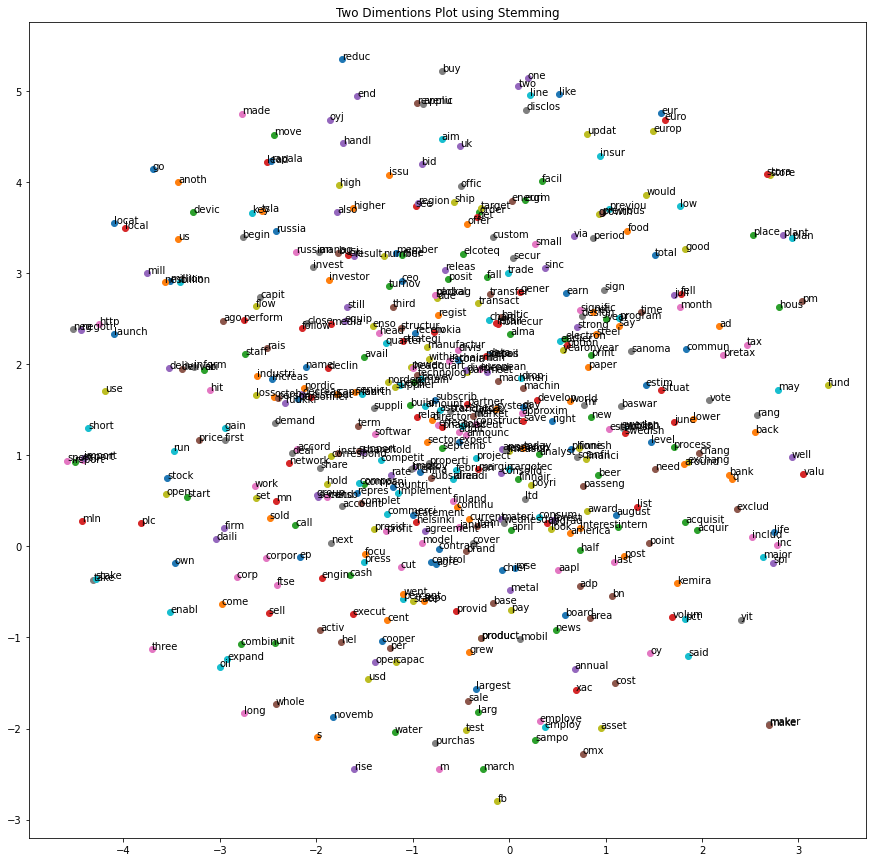

In [22]:
plot_two_dimension(model_stem_ft,"Two Dimentions Plot using Stemming")

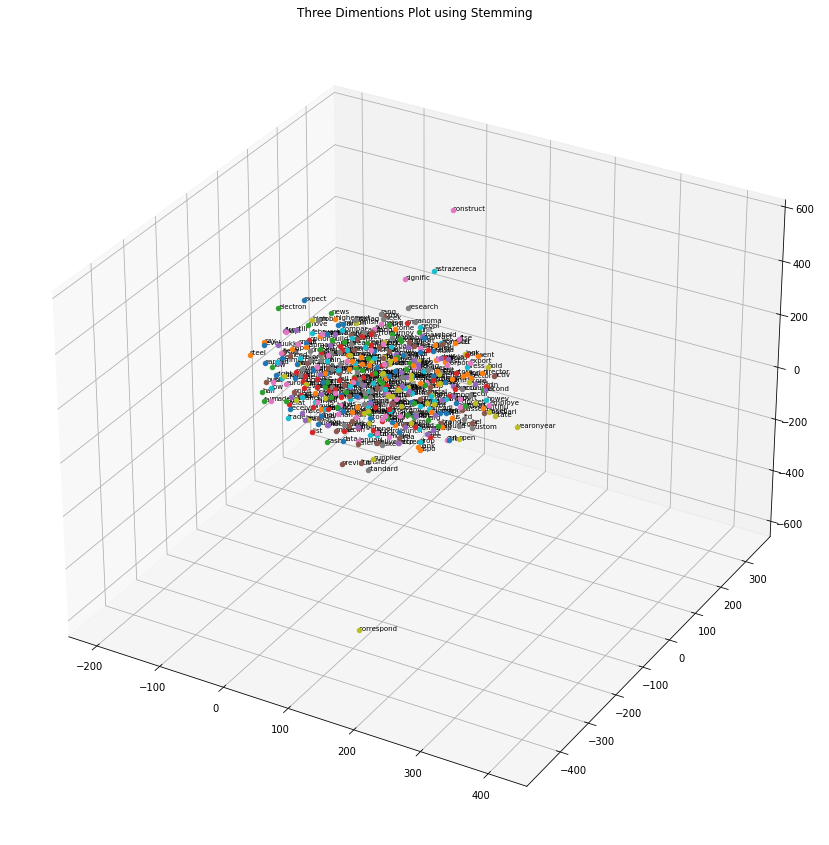

In [23]:
plot_three_dimension(model_stem_ft,"Three Dimentions Plot using Stemming")

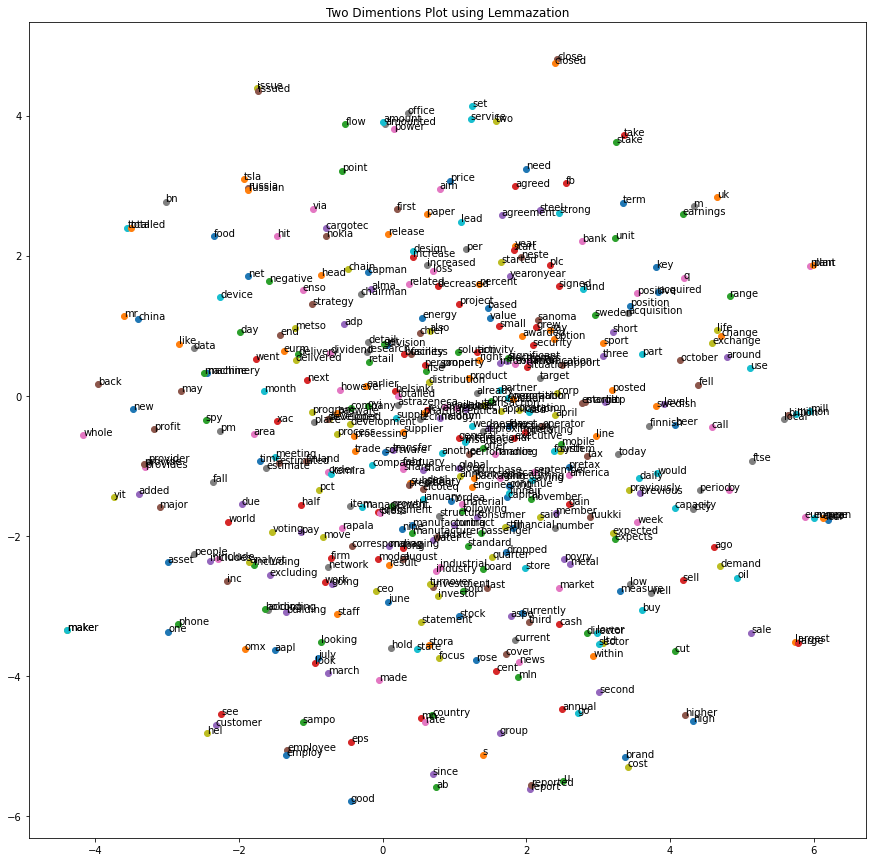

In [24]:
plot_two_dimension(model_lemma_ft,"Two Dimentions Plot using Lemmazation")

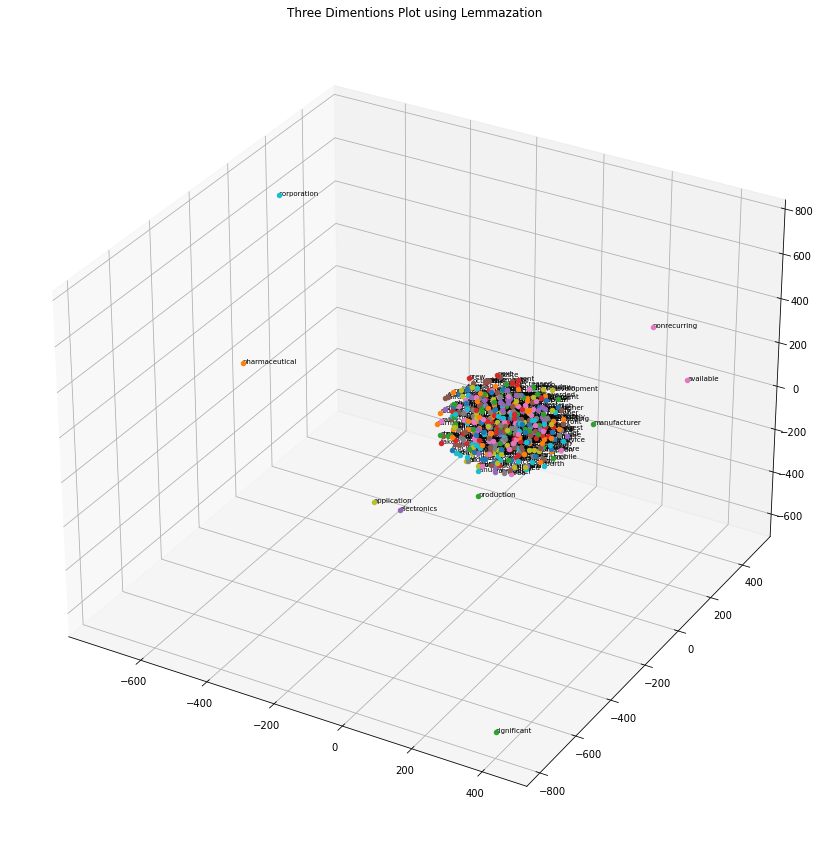

In [25]:
plot_three_dimension(model_lemma_ft,"Three Dimentions Plot using Lemmazation")

In [26]:
model_stem_ft.wv.most_similar("nokia")

[('via', 0.2861728370189667),
 ('subscrib', 0.26873600482940674),
 ('chairman', 0.2664529085159302),
 ('russia', 0.24156194925308228),
 ('purchas', 0.2375609427690506),
 ('dividend', 0.21523591876029968),
 ('divis', 0.2101980298757553),
 ('corpor', 0.19856229424476624),
 ('improv', 0.19544677436351776),
 ('handl', 0.19538652896881104)]

In [27]:
model_lemma_ft.wv.most_similar("plan")

[('plant', 0.5363336205482483),
 ('place', 0.3622778356075287),
 ('pm', 0.3114157021045685),
 ('posted', 0.26262471079826355),
 ('finnish', 0.2503034770488739),
 ('fell', 0.24288871884346008),
 ('level', 0.242170050740242),
 ('developer', 0.2214132398366928),
 ('detail', 0.21724021434783936),
 ('europe', 0.21479523181915283)]

#### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
# We preprocessing labels. Because y is nominal categoric variables. we use to same label in lemma and stem model. So preprocess who we will be apply, same each others
le = LabelEncoder()
y_train_stem = le.fit_transform(y_train_stem)
y_test_stem = le.transform(y_test_stem)

y_train_lemma = le.fit_transform(y_train_lemma)
y_test_lemma = le.transform(y_test_lemma)

#### Model fitting

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [30]:
def svc_model(x_train,y_train,x_test,y_test):
    svc = SVC()
    svc_model = svc.fit(x_train,y_train)
    y_pred = svc_model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_pred,y_test))
    plot_confusion_matrix(svc_model,x_train,y_train,cmap ='BuGn')
    plt.show()

In [31]:
def knn_model(x_train,y_train, x_test, y_test):
    knn =KNeighborsClassifier()
    knn_model = knn.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    print("Accuracy Score:", accuracy_score(y_pred, y_test))
    plot_confusion_matrix(knn_model,x_train,y_train,cmap = 'BuGn')
    plt.show()

In [32]:
def logistic_regression(x_train, y_train, x_test, y_test):
    lr = LogisticRegression()
    lr_model = lr.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_pred, y_test))
    plot_confusion_matrix(lr_model,x_train,y_train, cmap = 'BuGn')
    plt.show()

In [33]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [34]:
pd.DataFrame(y_train_lemma).value_counts()

1    2120
2    1233
0     561
dtype: int64

#### SVC Model

Accuracy Score: 0.6094398340248963


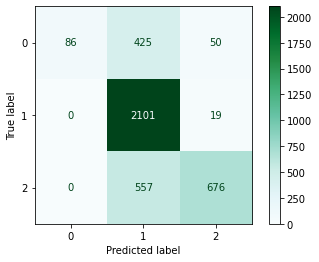

In [35]:
svc_model(X_train_stem_vectors_array,y_train_stem,X_test_stem_vectors_array, y_test_stem)

Accuracy Score: 0.6011410788381742


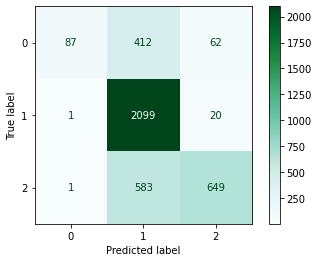

In [36]:
svc_model(X_train_lemma_vectors_array,y_train_lemma,X_test_lemma_vectors_array, y_test_lemma)

#### KNN Model

##### Stemezation

Accuracy Score: 0.5326763485477178


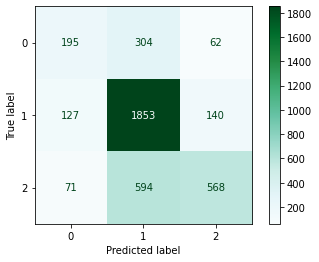

In [37]:
knn_model(X_train_stem_vectors_array,y_train_stem,X_test_stem_vectors_array, y_test_stem)

##### Lemmazation

Accuracy Score: 0.5259336099585062


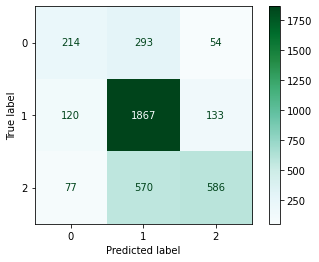

In [38]:
knn_model(X_train_lemma_vectors_array,y_train_lemma,X_test_lemma_vectors_array, y_test_lemma)

Naive Bayes

### TF-IDF

#### Model Split For TF-IDF

In [39]:
x_train_lemma_tf_idf, x_test_lemma_tf_idf, y_train_lemma_tf_idf, y_test_lemma_tf_idf = train_test_split(features_lemma,labels,test_size = 0.33, random_state = 42)
x_train_stem_tf_idf, x_test_stem_tf_idf, y_train_stem_tf_idf, y_test_stem_tf_idf = train_test_split(features_stem,labels,test_size = 0.33, random_state = 42)

#### TF-IDF process

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
def convert_array(text):
    result_list = []
    for sentence in text:
        sentence_joined = ','.join(map(str,sentence))
        sentence_last = sentence_joined.replace(","," ")
        result_list.append(sentence_last)
    return result_list

In [42]:
x_train_lemma_tf_idf_array = convert_array(x_train_lemma_tf_idf)
x_test_lemma_tf_idf_array = convert_array(x_test_lemma_tf_idf)
x_train_stem_tf_idf_array = convert_array(x_train_stem_tf_idf)
x_test_stem_tf_idf_array = convert_array(x_test_stem_tf_idf)

In [43]:
def tf_idf_and_sentence_vector(text,train,vectorizer):
    print("İt Will Start Vectorizing")
    if train:
        result = vectorizer.fit_transform(text)
    else:
        result= vectorizer.transform(text)
    print("TF- IDF processing was finished")
    print("Data Shape:",result.shape)
    return result.toarray(),vectorizer

We create a sentence vector using mean of the word vectors in sentences

In [44]:
##For lemma
vectorizer_lemma = TfidfVectorizer()
x_train_lemma_sentence_vector, vectorizer_lemma = tf_idf_and_sentence_vector(x_train_lemma_tf_idf_array,True,vectorizer_lemma)
x_test_lemma_sentence_vector, vectorizer_lemma =  tf_idf_and_sentence_vector(x_test_lemma_tf_idf_array,False,vectorizer_lemma)

##For Stem
##we have to different vectorizer from previouse vectorizer. Because previous vectorizer fitted x train lemma 
vectorizer_stem = TfidfVectorizer()
x_train_stem_sentence_vector, vectorizer_stem = tf_idf_and_sentence_vector(x_train_stem_tf_idf_array,True, vectorizer_stem)
x_test_stem_sentence_vector, vectorizer_stem = tf_idf_and_sentence_vector(x_test_stem_tf_idf_array,False, vectorizer_stem)

İt Will Start Vectorizing
TF- IDF processing was finished
Data Shape: (3914, 7763)
İt Will Start Vectorizing
TF- IDF processing was finished
Data Shape: (1928, 7763)
İt Will Start Vectorizing
TF- IDF processing was finished
Data Shape: (3914, 6578)
İt Will Start Vectorizing
TF- IDF processing was finished
Data Shape: (1928, 6578)


**Label Encoding For labels in tf-idf process**

In [45]:
try:
    print("Label Encoding is started")
    lr_tf_idf = LabelEncoder()
    y_train_lemma_tf_idf = lr_tf_idf.fit_transform(y_train_lemma_tf_idf)
    y_test_lemma_tf_idf = lr_tf_idf.transform(y_test_lemma_tf_idf)

    y_train_stem_tf_idf = lr_tf_idf.fit_transform(y_train_stem_tf_idf)
    y_test_stem_tf_idf = lr_tf_idf.transform(y_test_stem_tf_idf)
    print("Label Encoding had finished")
except err:
    print("Fault had found",err)


Label Encoding is started
Label Encoding had finished


In [46]:
print("Unique Values of Labels")
print("y lemma train:", np.unique(y_train_lemma_tf_idf))
print("y lemma test:", np.unique(y_test_lemma_tf_idf))
print("y stem train:", np.unique(y_train_stem_tf_idf))
print("y stem test:",np.unique(y_test_stem_tf_idf))
print("-"*30)
print("Shapes of Labels")
print("y lemma train:", np.shape(y_train_lemma_tf_idf))
print("y lemma test:", np.shape(y_test_lemma_tf_idf))
print("y stem train:", np.shape(y_train_stem_tf_idf))
print("y stem test:",np.shape(y_test_stem_tf_idf))

Unique Values of Labels
y lemma train: [0 1 2]
y lemma test: [0 1 2]
y stem train: [0 1 2]
y stem test: [0 1 2]
------------------------------
Shapes of Labels
y lemma train: (3914,)
y lemma test: (1928,)
y stem train: (3914,)
y stem test: (1928,)


### Model Fitting

#### KNN

Lemma

Accuracy Score: 0.6156639004149378


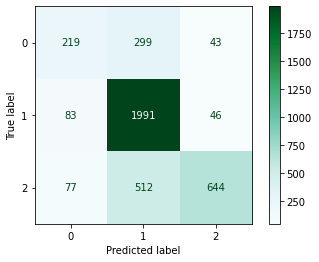

In [47]:
knn_model(x_train_lemma_sentence_vector,y_train_lemma_tf_idf,x_test_lemma_sentence_vector,y_test_lemma_tf_idf)

Stem

Accuracy Score: 0.6192946058091287


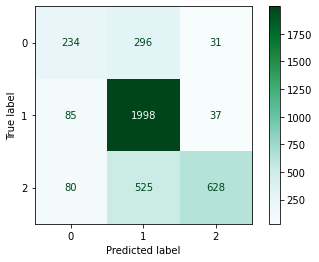

In [48]:
knn_model(x_train_stem_sentence_vector,y_train_stem_tf_idf,x_test_stem_sentence_vector,y_test_stem_tf_idf)

#### SVC Model

Lemma

Accuracy Score: 0.6664937759336099


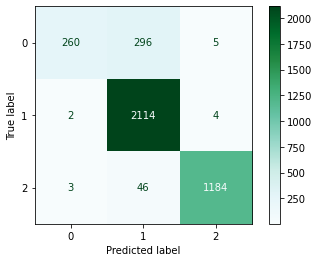

In [49]:
svc_model(x_train_lemma_sentence_vector,y_train_lemma_tf_idf,x_test_lemma_sentence_vector,y_test_lemma_tf_idf)

Stem

Accuracy Score: 0.6768672199170125


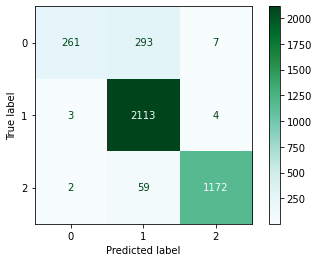

In [50]:
svc_model(x_train_stem_sentence_vector,y_train_stem_tf_idf,x_test_stem_sentence_vector,y_test_stem_tf_idf)

#### Logistic Regression Model

Lemma

Accuracy Score: 0.6893153526970954


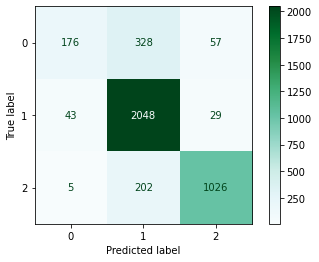

In [51]:
logistic_regression(x_train_lemma_sentence_vector,y_train_lemma_tf_idf,x_test_lemma_sentence_vector,y_test_lemma_tf_idf)

Stem

Accuracy Score: 0.6970954356846473


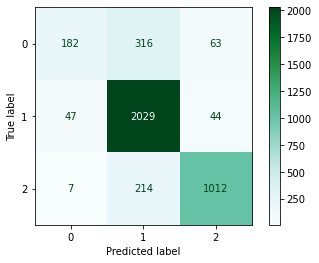

In [52]:
logistic_regression(x_train_stem_sentence_vector,y_train_stem_tf_idf,x_test_stem_sentence_vector,y_test_stem_tf_idf)